<a href="https://colab.research.google.com/github/hasnatosman/python_oop/blob/master/python_oop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of OOP
Object-Oriented Programming (OOP) is a programming paradigm based on the concept of objects. These objects can contain data (attributes) and code (methods) to operate on the data.

## Class
A class is a blueprint for creating objects. It defines attributes and methods that the objects will have.

In [2]:
class Car:
  def __init__(self, brand, model):
    self.brand = brand
    self.model = model


## Object
An object is an instance of a class that encapsulates data and behavior.

In [3]:
car1 = Car('Toyota', 'Corolla')
print(car1.brand)
print(car1.model)

Toyota
Corolla


## Identity
Every object has a unique identity, which can be checked using the id() function.

In [6]:
car1 = Car('Toyota', 'Corolla')
car2 = Car('Toyota', 'Corolla')
print(id(car1) == id(car2) )

False


## Pillars of OOP

*   **Encapsulation**: Wrapping data and methods into a single unit (class).
*   **Abstraction**: Hiding implementation details and showing only functionality.
*   **Inheritance**: Deriving new classes from existing ones.
*   **Polymorphism**: Using a single interface to represent different types.

### 1. Encapsulation
**Definition:** Encapsulation is the bundling of data (attributes) and methods (functions) into a single unit, usually a class. It also involves restricting access to some components using access modifiers to ensure controlled interaction.

In [16]:
class BankAccount:
  def __init__(self, balance):
    self.__balance = balance      # private attribute

  def deposit(self, amount):
    if amount > 0:
      self.__balance += amount

  def withdraw(self, amount):
    if 0 < amount <= self.__balance:
      self.__balance -= amount
    else:
      print("Invalid withdrawal amount!")

  def get_balance(self):
    return self.__balance


# usage

account = BankAccount(1000)
account.deposit(500)
print(account.get_balance())
account.__balance = 5000  # This won't change the actual balance
print(account.get_balance())  # Output: 1500

1500
1500


**Explanation:**

The attribute `__balance` is private and cannot be directly accessed or modified.
Access to the balance is controlled via public methods like `deposit`, `withdraw`, and `get_balance`.

### 2. Abstraction
**Definition:**
Abstraction involves hiding complex implementation details and exposing only the essential features of an object.

In [1]:
from abc import ABC, abstractmethod
class PaymentProcessor(ABC):
  @abstractmethod
  def process_payment(self, amount):
    pass


class CreditCardProcessor(PaymentProcessor):
  def process_payment(self, amount):
    print(f"Processing credit card payment of ${amount}")


class PapalProcessor(PaymentProcessor):
  def process_payment(self, amount):
    print(f"Processing Paypal payment of $ {amount}")

# Usage
def make_payment(processor:PaymentProcessor, amount):
  processor.process_payment(amount)


make_payment(CreditCardProcessor(),100)
make_payment(PapalProcessor(),50)

Processing credit card payment of $100
Processing Paypal payment of $ 50


**Explanation:**

*  The `PaymentProcessor` class is abstract, providing a general blueprint for payment processing.
*  Subclasses like `CreditCardProcessor` and `PayPalProcessor` implement the specific details.
*  The client code interacts only with the abstract interface, not the underlying implementation.

### 3. Inheritance
**Definition**:
Inheritance is a mechanism where one class (`child`) inherits the properties and behaviors of another class (`parent`). It allows for code reuse and the creation of hierarchical relationships.

In [4]:
class Animal:
  def __init__(self, name):
    self.name = name

  def speak(self):
    return f"{self.name} makes a sound."

class Dog(Animal):
  def speak(self):
    return f"{self.name} barks."

class Cat(Animal):
  def speak(self):
    return f"{self.name} meaw."

# Usage
dog = Dog('Rex')
cat = Cat('Tommy')
print(dog.speak())
print(cat.speak())

Rex barks.
Tommy meaw.


**Explanation**:

*  The `Animal` class is a parent class with a generic `speak` method.
*  The `Dog` and `Cat` classes inherit from `Animal` and `override` the `speak` method to provide specific behavior.

### 4. Polymorphism
**Definition**:
`Polymorphism` allows objects of different classes to be treated as objects of a common parent `class`, typically through method overriding or interfaces.

In [6]:
class Shape():
  def area(self):
    pass

class Circle(Shape):
  def __init__(self, radius):
    self.radius = radius

  def area(self):
    return 3.14 * self.radius ** 2

class Rectangle(Shape):
  def __init__(self, width, height):
    self.width = width
    self.height = height

  def area(self):
    return self.width * self.height


# Usage
shapes = [Circle(5), Rectangle(5,6)]
for shape in shapes:
  print(f"Area: {shape.area()}")

Area: 78.5
Area: 30


**Explanation**:

*  Both `Circle` and `Rectangle` inherit from the `Shape` class and implement the `area` method.
*  The `shapes` list can contain objects of different types (`Circle` and `Rectangle`) but be treated uniformly as `Shape` objects.

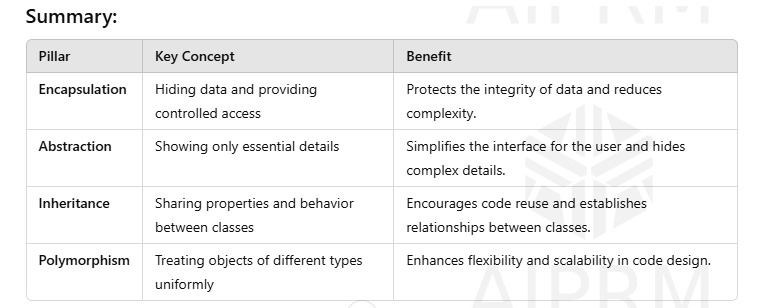

## Dependency
A relationship where one class depends on another to perform its function.

In [7]:
class Engine:
    def start(self):
        return "Engine started"

class Car:
    def __init__(self, engine):
        self.engine = engine

    def start_car(self):
        return self.engine.start()

engine = Engine()
car = Car(engine)
print(car.start_car())  # Output: Engine started


Engine started


## Composition
A "has-a" relationship where one class contains an object of another class.

In [8]:
class Engine:
    def start(self):
        return "Engine started"

class Car:
    def __init__(self):
        self.engine = Engine()

    def start_car(self):
        return self.engine.start()

car = Car()
print(car.start_car())  # Output: Engine started


Engine started


## KISS (Keep It Simple, Stupid)
Design should be as simple as possible.

In [10]:
# Simple and clear function
def add_numbers(a, b):
    return a + b

add_numbers(3,5)

8

## YAGNI (You Aren't Gonna Need It)
Avoid implementing functionality until it is necessary.

In [13]:
# Avoid over-engineering
class SimpleCalculator:
    def add(self, a, b):
        return a + b

## DRY (Don't Repeat Yourself)
Avoid duplicating code by abstracting repetitive logic.

In [14]:
def calculate_area(length, width):
    return length * width


## SOLID
*  S: Single Responsibility Principle
*  O: Open/Closed Principle
*  L: Liskov Substitution Principle
*  I: Interface Segregation Principle
*  D: Dependency Inversion Principle

In [15]:
class Logger:
    def log(self, message):
        print(message)

class Order:
    def __init__(self, logger):
        self.logger = logger

    def place_order(self):
        self.logger.log("Order placed")

logger = Logger()
order = Order(logger)
order.place_order()  # Output: Order placed


Order placed


## Design Principles vs Design Patterns
*  Design Principles: Guidelines for writing clean, maintainable code (e.g., SOLID, DRY).
*  Design Patterns: Reusable solutions to common problems (e.g., Singleton, Factory).

## Cohesion and Coupling
*  Cohesion: Degree to which elements of a module belong together.
*  Coupling: Degree of dependency between modules.

In [16]:
class UserManager:
    def add_user(self, name):
        print(f"User {name} added")


## Law of Demeter
A class should only communicate with its direct dependencies.

In [17]:
class Engine:
    def start(self):
        return "Engine started"

class Car:
    def __init__(self, engine):
        self.engine = engine

    def start(self):
        return self.engine.start()

car = Car(Engine())
print(car.start())  # Output: Engine started


Engine started


## OOP Interview Questions Discussion
Prepare to discuss and answer questions about:

*  Real-life examples of OOP principles.
*  When to use composition vs inheritance.
*  Advantages of SOLID principles.



---

